## Process HPC files for performance matrix

In [7]:
import openml
import pandas as pd
import numpy as np

In [8]:
def process_hpc_file(file):
    lines = []
    with open(file, "r") as f:
        data = f.readlines()
    for line in data:
        if line.startswith("INFO:root") and (not "https" in line and not "fallback" in line and not "sklearn.utils" in line):
            lines.append(line)
    ids = set()
    results = []
    for line in lines:
        items = "".join(line.replace("INFO:root:", "")).replace("in", "").replace("seconds", "").strip().split(",")
        dataset_id, pipeline = int(items[0]), int(items[1].strip())
        remainder = items[2].strip().split(" ")
        score, time = float(remainder[0]), float(remainder[2])
        ids.add(dataset_id)
        results.append([dataset_id, pipeline, score, time])
    
    df = pd.DataFrame(index = list(ids), columns = range(250))
    df_time = pd.DataFrame(index = list(ids), columns = range(250))
    for result in results:
        df_time.loc[result[0], result[1]] = result[3]
        time_result = df_time.loc[result[0], result[1]]
        if time_result > 900:
            df.loc[result[0], result[1]] = None
        else:
            df.loc[result[0], result[1]] = result[2]
    
    return df

In [51]:
df_first = process_hpc_file("hpc_output/bin/slurm-118181.out")
df_second = process_hpc_file("hpc_output/bin/slurm-118191.out")
df_third = process_hpc_file("hpc_output/bin/slurm-118234.out")
df_fourth = process_hpc_file("hpc_output/bin/slurm-118274.out")
df_fifth = process_hpc_file("hpc_output/bin/slurm-118275.out")
df_sixth = process_hpc_file("hpc_output/bin/slurm-118368.out")
df_seventh = process_hpc_file("hpc_output/bin/slurm-118369.out")
df_eighth = process_hpc_file("hpc_output/bin/slurm-118417.out")
df_ninth = process_hpc_file("hpc_output/bin/slurm-118523.out")
df_tenth = process_hpc_file("hpc_output/bin/slurm-118553.out")
df_eleventh = process_hpc_file("hpc_output/bin/slurm-118573.out")
df_additional = process_hpc_file("hpc_output/bin/slurm-118421_additional.out")

In [52]:
data_so_far = pd.concat([
    df_first, 
    df_second, 
    df_third,
    df_fourth,
    df_fifth,
    df_sixth,
    df_seventh,
    df_eighth,
    df_ninth,
    df_tenth,
    df_eleventh], axis = 0)

In [161]:
first = process_hpc_file("hpc_output/multi/slurm-118693.out")
second = process_hpc_file("hpc_output/multi/slurm-118694.out")
third = process_hpc_file("hpc_output/multi/slurm-118765.out")
fourth = process_hpc_file("hpc_output/multi/slurm-118767.out")
fifth = process_hpc_file("hpc_output/multi/slurm-118873.out")
sixth = process_hpc_file("hpc_output/multi/slurm-118874.out")
seventh = process_hpc_file("hpc_output/multi/slurm-118991.out")
eighth = process_hpc_file("hpc_output/multi/slurm-118992.out")
ninth = process_hpc_file("hpc_output/multi/slurm-119140.out")
tenth = process_hpc_file("hpc_output/multi/slurm-119141.out")


In [165]:
data_multi = pd.concat([
    first,
    second,
    third,
    fourth,
    fifth,
    sixth,
    seventh,
    eighth,
    ninth,
    tenth], axis = 0)*-1

In [167]:
def min_max_scaling(
    row
):
    return (row - row.min()) / (row.max() - row.min())

for row in data_multi.index:
    data_multi.loc[row] = min_max_scaling(data_multi.loc[row])

In [170]:
candidate_pipelines = pd.read_csv("SBPort/training/candidate_pipelines/candidate_pipelines_multi.csv")
data_multi.columns = candidate_pipelines["pipelines"].values
data_multi.to_csv("SBPort/training/performance_matrices/performance_matrix_multi.csv")

In [171]:
data_multi

,"Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('2',FeatureAgglomeration(affinity='l1',linkage='complete')),('1',SelectFwe(alpha=0.017)),('0',GradientBoostingClassifier(learning_rate=0.5,max_depth=5,max_features=0.2,min_samples_leaf=13,min_samples_split=6,subsample=0.2))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('0',RandomForestClassifier(bootstrap=False,max_features=0.2,min_samples_leaf=2))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('0',ExtraTreesClassifier(max_features=0.55,min_samples_leaf=20,min_samples_split=3))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('1',MaxAbsScaler()),('0',ExtraTreesClassifier(max_features=0.8,min_samples_leaf=2,min_samples_split=16))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('0',RandomForestClassifier(max_features=0.2,min_samples_leaf=14,min_samples_split=4))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('0',GradientBoostingClassifier(max_depth=10,max_features=0.05,min_samples_leaf=13,min_samples_split=17))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('1',SelectPercentile(percentile=66)),('0',RandomForestClassifier(bootstrap=False,max_features=0.15000000000000002,min_samples_leaf=2,min_samples_split=6))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('0',ExtraTreesClassifier(criterion='entropy',max_features=0.55,min_samples_leaf=2,min_samples_split=12))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('1',SelectPercentile(percentile=55)),('0',RandomForestClassifier(max_features=0.35000000000000003,min_samples_leaf=7,min_samples_split=15))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('0',GradientBoostingClassifier(max_depth=6,max_features=0.8,min_samples_leaf=5,min_samples_split=12,subsample=0.7500000000000001))])",...,"Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('1',StandardScaler()),('0',RandomForestClassifier(bootstrap=False,max_features=0.15000000000000002,min_samples_leaf=7,min_samples_split=14))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('1',SelectFwe(alpha=0.032)),('0',GradientBoostingClassifier(learning_rate=0.5,max_depth=1,max_features=0.15000000000000002,min_samples_leaf=16,min_samples_split=6,subsample=0.7000000000000001))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('2',MaxAbsScaler()),('1',MaxAbsScaler()),('0',RandomForestClassifier(criterion='entropy',max_features=0.8,min_samples_leaf=13,min_samples_split=3))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('2',Normalizer(norm='l1')),('1',MinMaxScaler()),('0',ExtraTreesClassifier(criterion='entropy',max_features=0.8500000000000001))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('1',MinMaxScaler()),('0',GradientBoostingClassifier(max_depth=6,max_features=0.25,min_samples_leaf=16,min_samples_split=9,subsample=0.6000000000000001))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('0',LogisticRegression(C=0.5))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('1',RobustScaler()),('0',GradientBoostingClassifier(max_depth=6,max_features=0.25,min_samples_leaf=16,min_samples_split=9,subsample=0.6000000000000001))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('1',MinMaxScaler()),('0',ExtraTreesClassifier(max_features=0.8,min_samples_leaf=2,min_samples_split=5))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('2',MaxAbsScaler()),('1',PolynomialFeatures(include_bias=False)),('0',ExtraTreesClassifier(max_features=0.1,min_samples_leaf=3,min_samples_split=16))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('1',RobustScaler()),('0',ExtraTreesClassifier(criterion='entropy',max_features=0.9000000000000001))])"
185,0.741236,0.000579,0.001466,0.000196,0.00101,0.00166,0.002181,0.000136,0.00097,0.00645,...,0.

In [172]:
first = process_hpc_file("hpc_output/regr/regr_perf_matrix_p1.out")
second = process_hpc_file("hpc_output/regr/regr_perf_matrix_p2.out")
third = process_hpc_file("hpc_output/regr/regr_perf_matrix_p3.out")
fourth = process_hpc_file("hpc_output/regr/regr_perf_matrix_p4.out")
fifth = process_hpc_file("hpc_output/regr/regr_perf_matrix_p5.out")
sixth = process_hpc_file("hpc_output/regr/regr_perf_matrix_p6.out")
seventh = process_hpc_file("hpc_output/regr/regr_perf_matrix_p7.out")
eighth = process_hpc_file("hpc_output/regr/regr_perf_matrix_p8.out")
ninth = process_hpc_file("hpc_output/regr/regr_perf_matrix_p9.out")
tenth = process_hpc_file("hpc_output/regr/regr_perf_matrix_p10.out")
eleventh = process_hpc_file("hpc_output/regr/regr_perf_matrix_p11.out")
twelveth = process_hpc_file("hpc_output/regr/regr_perf_matrix_p12.out")
thirteenth = process_hpc_file("hpc_output/regr/regr_perf_matrix_p13.out")
fourteenth = process_hpc_file("hpc_output/regr/regr_perf_matrix_p14.out")
fifteenth = process_hpc_file("hpc_output/regr/regr_perf_matrix_p15.out")
sixteenth = process_hpc_file("hpc_output/regr/regr_perf_matrix_p16.out")
seventeenth = process_hpc_file("hpc_output/regr/regr_perf_matrix_p17.out")
eighteenth = process_hpc_file("hpc_output/regr/regr_perf_matrix_p18.out")


In [173]:
data_regr = pd.concat([
    first,
    second,
    third,
    fourth,
    fifth,
    sixth,
    seventh,
    eighth,
    ninth,
    tenth,
    eleventh,
    twelveth,
    thirteenth,
    fourteenth,
    fifteenth,
    sixteenth,
    seventeenth,
    eighteenth], axis = 0)

In [174]:
candidate_pipelines = pd.read_csv("SBPort/training/candidate_pipelines/candidate_pipelines_regr.csv")

In [175]:
data_regr.columns = candidate_pipelines["pipelines"].values

In [106]:
data_regr.max(axis = 0)

0       96360.191593
1       93944.130583
2       92295.751773
3      312603.816572
4      316797.012084
           ...      
245     86465.943486
246    113446.535834
247     92778.846304
248    101084.272073
249    106406.612058
Length: 250, dtype: object

In [176]:
def min_max_scaling(
    row
):
    return (row - row.min()) / (row.max() - row.min())


for row in data_regr.index:
    data_regr.loc[row] = min_max_scaling(data_regr.loc[row])

In [177]:
data_regr

,"Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('0',ExtraTreesRegressor(max_features=0.25,min_samples_leaf=3,min_samples_split=5))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('1',StandardScaler()),('0',RandomForestRegressor(bootstrap=False,max_features=0.55,min_samples_leaf=6,min_samples_split=5))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('1',PolynomialFeatures(include_bias=False)),('0',RandomForestRegressor(max_features=0.3,min_samples_split=20))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('2',PolynomialFeatures(include_bias=False)),('1',FeatureAgglomeration(affinity='l2',linkage='complete')),('0',ElasticNetCV(l1_ratio=0.9500000000000001,tol=0.001))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('2',SelectPercentile(percentile=99,score_func=f_regression)),('1',Normalizer(norm='l1')),('0',DecisionTreeRegressor(max_depth=2,min_samples_leaf=14,min_samples_split=9))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('0',GradientBoostingRegressor(alpha=0.99,loss='huber',max_depth=9,max_features=1.0,min_samples_leaf=5,min_samples_split=7,subsample=0.8500000000000001))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('2',MaxAbsScaler()),('1',MinMaxScaler()),('0',ExtraTreesRegressor(max_features=0.9000000000000001,min_samples_leaf=12,min_samples_split=15))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('2',Nystroem(gamma=0.4,kernel='linear',n_components=9)),('1',SelectFwe(alpha=0.017,score_func=f_regression)),('0',LinearSVR(C=0.1,dual=False,epsilon=0.001,loss='squared_epsilon_insensitive',tol=0.01))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('2',Normalizer(norm='max')),('1',Binarizer(threshold=0.4)),('0',DecisionTreeRegressor(max_depth=2,min_samples_leaf=6,min_samples_split=14))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('0',ExtraTreesRegressor(max_features=0.05,min_samples_leaf=2,min_samples_split=8))])",...,"Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('2',SelectPercentile(percentile=24,score_func=f_regression)),('1',MaxAbsScaler()),('0',ElasticNetCV(l1_ratio=0.15000000000000002,tol=0.001))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('0',ExtraTreesRegressor(bootstrap=True,max_features=0.4,min_samples_split=17))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('0',ExtraTreesRegressor(bootstrap=True,max_features=0.55,min_samples_leaf=2,min_samples_split=7))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('2',Binarizer(threshold=0.7000000000000001)),('1',MinMaxScaler()),('0',AdaBoostRegressor(learning_rate=0.1,loss='exponential',n_estimators=100))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('1',RobustScaler()),('0',ExtraTreesRegressor(max_features=0.45,min_samples_split=10))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('0',GradientBoostingRegressor(alpha=0.95,max_depth=7,max_features=0.45,min_samples_leaf=2,min_samples_split=11,subsample=0.9500000000000001))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('2',PCA(iterated_power=9,svd_solver='randomized')),('1',RobustScaler()),('0',KNeighborsRegressor(n_neighbors=6,p=1))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('0',RandomForestRegressor(bootstrap=False,max_features=0.6000000000000001,min_samples_leaf=3,min_samples_split=12))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('0',ExtraTreesRegressor(max_features=0.9000000000000001,min_samples_leaf=7,min_samples_split=9))])","Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('2',RobustScaler()),('1',MinMaxScaler()),('0',RandomForestRegressor(max_features=0.3,min_samples_leaf=19,min_samples_split=13))])"
8,0.197086,0.074693,0.109368,0.275684,0.431546,0.312322,0.070288,0.23389,0.295084,0.171137,...,0.

In [151]:
data_regr.to_csv("SBPort/training/performance_matrices/performance_matrix_regr.csv")

In [119]:
from clustering import MetaOPTICS
meta_features = pd.read_csv("SBPort/training/raw_metafeatures/metafeatures_regr.csv", index_col = 0)

In [122]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer

numerical_features_with_outliers = [
        "cov_mean", "cov_sd", "iqr_mean", "iqr_sd", "max_mean", "max_sd", "mean_mean", "mean_sd", "median_mean", 
        "median_sd", "min_mean", "min_sd", "sd_mean", "sd_sd", "variance_mean", "variance_sd"
        ]

numerical_features_norm = list(set(meta_features.columns) - set(numerical_features_with_outliers))

numerical_transformer_normal = Pipeline(
        steps=[
            ("imputer", SimpleImputer(strategy = "mean")),
            ("scaler", MinMaxScaler())
        ]
    )

numerical_transformer_outliers = Pipeline(
steps=[
    ("imputer", SimpleImputer(strategy = "median")),
    ("scaler", StandardScaler())
]
)

preprocessor = ColumnTransformer(
transformers=[
    ("num_outliers", numerical_transformer_outliers, numerical_features_with_outliers),
    ("num", numerical_transformer_normal, numerical_features_norm),

]
)
preprocessor.fit(meta_features)


ColumnTransformer(transformers=[('num_outliers',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['cov_mean', 'cov_sd', 'iqr_mean', 'iqr_sd',
                                  'max_mean', 'max_sd', 'mean_mean', 'mean_sd',
                                  'median_mean', 'median_sd', 'min_mean',
                                  'min_sd', 'sd_mean', 'sd_sd', 'variance_mean',
                                  'variance_sd']),
                                ('num',
                                 Pipeline(steps=[('imputer...
                                  'bayesian_ridge_mean', 'linear_regr_mean',
                                  'cor_sd', 'skewness_target', 'skewness_mean',
                                  'target_corr_sd', 'target_corr_mean',
                                  'cor_mean', 'kurtosis_mean', 'outliers',
                                  'best_node_mean', 'skewness_sd', 'nr_cat',
                                  'random_node_mean', 'nr_inst', 'missing_mean',
                                  'num_to_cat_ratio', 'attr_to_inst_ratio',
                                  'nr_num', 'worst_node_mean', 'nr_feat',
                                  'attr_entropy_mean', 'attr_conc_mean',
                                  'kurtosis_target'])])

In [123]:
transformed_mf = preprocessor.transform(meta_features)

(202, 46)

In [142]:
clf = MetaOPTICS(
    transformed_mf,
    eps = 0.5,
    min_samples = 10
)

clf.fit(transformed_mf)

MetaOPTICS(eps=0.5,
           mf_dataframe=array([[-0.07053456, -0.07053456, -0.07053554, ...,  0.30060728,
         0.16442177,  0.01345199],
       [-0.07053456, -0.07053456, -0.07053554, ...,  0.30060728,
         0.16442177,  0.00352536],
       [-0.07053456, -0.07053456, -0.07053553, ...,  0.30060728,
         0.16442177,  0.00283373],
       ...,
       [-0.07053456, -0.07053456, -0.07053546, ...,  0.20325657,
         0.00034669,  0.00037374],
       [-0.07053456, -0.07053456, -0.07046553, ...,  0.12255891,
         0.15941502,  0.        ],
       [-0.07053456, -0.07053456, -0.07053552, ...,  0.17700411,
         0.00224646,  0.01018988]]),
           min_samples=10)

In [143]:
import numpy as np

labels, count = np.unique(clf.labels_, return_counts = True)

In [154]:
import pandas as pd

performance_matrix_multi = pd.read_csv("SBPort/training/performance_matrices/performance_matrix_multi.csv", index_col = 0)

In [159]:
performance_matrix_multi.mean(axis = 0).sort_values(ascending = False)

Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('0',GradientBoostingClassifier(max_depth=5,max_features=1.0,min_samples_leaf=5,min_samples_split=12,subsample=0.7500000000000001))])                                                                                                                   0.965296
Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('0',GradientBoostingClassifier(max_depth=6,max_features=1.0,min_samples_leaf=5,min_samples_split=12,subsample=0.7500000000000001))])                                                                                                                   0.963162
Pipeline(steps=[('imputation',SimpleImputer(strategy='median')),('0',GradientBoostingClassifier(max_depth=6,max_features=0.8,min_samples_leaf=5,min_samples_split=12,subsample=0.7500000000000001))])                                                                                                                   0.962181
Pipeline(steps=[('imputation',SimpleI

## Convient way to print out automl benchmark ids & names

In [2]:
import openml
from sklearn.model_selection import train_test_split
all_datasets = openml.datasets.list_datasets()
automl_dids = openml.study.get_suite(271).data
binary_automlbench_dids = [did for did in automl_dids if (all_datasets[did]["NumberOfClasses"] == 2 and all_datasets[did]["NumberOfInstances"]*all_datasets[did]["NumberOfFeatures"] < 10_000_000 and all_datasets[did]["NumberOfInstances"] < 500_000)]
multi_automlbench_dids = [did for did in automl_dids if (all_datasets[did]["NumberOfClasses"] > 2 and all_datasets[did]["NumberOfInstances"]*all_datasets[did]["NumberOfFeatures"] < 10_000_000 and all_datasets[did]["NumberOfInstances"] < 500_000)]
binary_validation, binary_test = train_test_split(binary_automlbench_dids, train_size = 0.33, random_state = 42)
multi_validation, multi_test = train_test_split(multi_automlbench_dids, train_size = 0.33, random_state = 42)


In [5]:
regr_dids = openml.study.get_suite(269).data
regr_automlbench_dids = [did for did in regr_dids if (all_datasets[did]["NumberOfInstances"]*all_datasets[did]["NumberOfFeatures"] < 10_000_000 and all_datasets[did]["NumberOfInstances"] < 500_000)]
regr_val, regr_test = train_test_split(regr_automlbench_dids, train_size = 0.33, random_state = 42)

In [11]:
for id in regr_test:
    dataset = openml.datasets.get_dataset(id)
    X, y, categorical_indicator, attribute_names = dataset.get_data(
        dataset_format="array", target=dataset.default_target_attribute
    )
    if "sparse" in dataset.format.lower():
        print(id)

3050


3277


In [5]:
for did in binary_test[6:]:
    print(did, all_datasets[did]["name"], all_datasets[did]["NumberOfInstances"], all_datasets[did]["NumberOfFeatures"])

41162 kick 72983.0 33.0
4135 Amazon_employee_access 32769.0 10.0
1464 blood-transfusion-service-center 748.0 5.0
40981 Australian 690.0 15.0
31 credit-g 1000.0 21.0
3 kr-vs-kp 3196.0 37.0
41143 jasmine 2984.0 145.0
1494 qsar-biodeg 1055.0 42.0
41157 arcene 100.0 10001.0
41142 christine 5418.0 1637.0
40983 wilt 4839.0 6.0
23517 numerai28.6 96320.0 22.0
1486 nomao 34465.0 119.0
1489 phoneme 5404.0 6.0
41146 sylvine 5124.0 21.0


In [21]:
len(binary_test)

21

In [10]:
for did in regr_automlbench_dids:
    print(all_datasets[did]["name"])

Moneyball
diamonds
Mercedes_Benz_Greener_Manufacturing
quake
sensory
socmob
space_ga
tecator
wine_quality
elevators
black_friday
Brazilian_houses
topo_2_1
yprop_4_1
OnlineNewsPopularity
colleges
abalone
us_crime
pol
SAT11-HAND-runtime-regression
house_sales
boston
house_prices_nominal
house_16H
QSAR-TID-11
QSAR-TID-10980
MIP-2016-regression


## GAMA time plot 

In [68]:
import pandas as pd
import numpy as np

data = pd.read_csv("SBPort/results/gama_no_ws/bin/gama_logs_1464/evaluations.log", sep=";")
eval(data["score"][0].replace("-inf", "np.nan"))[0]

In [70]:
data_selected = data[["t_start", "score"]]
data_selected = data_selected.sort_values(by = "t_start")
data_selected["score"] = data_selected["score"].apply(lambda x: eval(x.replace("-inf", "np.nan"))[0])

In [71]:
#apply rolling
data_selected["t_start"] = data_selected["t_start"].str.replace(",", ".")

In [72]:
data_selected.dropna(inplace = True)

In [74]:
data_selected["t_start"] = pd.to_datetime(data_selected["t_start"], format = "%Y-%m-%d %H:%M:%S.%f")

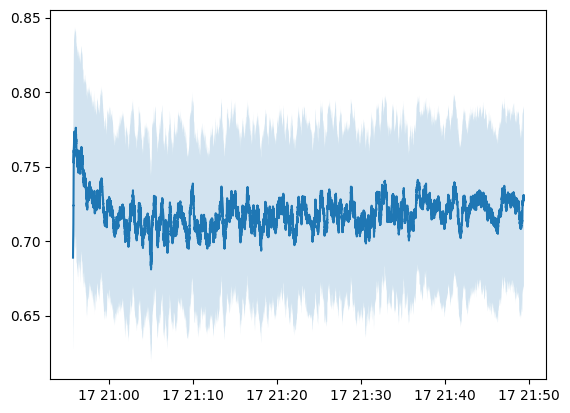

In [94]:
scores = data_selected["score"].rolling(250).mean()
error_above = data_selected["score"].rolling(250).mean() + data_selected["score"].rolling(250).std()/2
error_below = data_selected["score"].rolling(250).mean() - data_selected["score"].rolling(250).std()/2
plt.plot(data_selected["t_start"], scores)
plt.fill_between(data_selected["t_start"], error_above, error_below, interpolate = False, alpha = 0.2)

## Cluster VS All plot

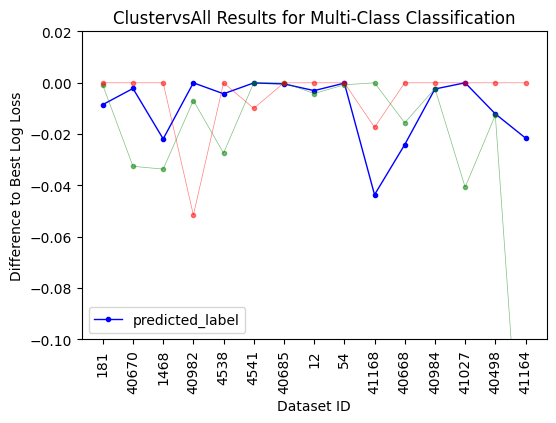

In [21]:
import pandas as pd
import numpy as np
data_multi = [
    [-1.1039784447918477, -1.0963722065904362, -1.0954789649418264],
    [-0.11427647909206398, -0.14460964442409088, -0.11207384108878264],
    [-0.24243753183875505, -0.25420695776536484, -0.22057849302641128],
    [-0.9449077432793667, -0.9518066251120377, -0.9964570286690145],
    [-1.280465082134773, -1.3035951272770372, -1.2761905999008323],
    [-0.9002299871003444, -0.9001790920963145, -0.9101381751536337],
    [-0.0014900511675229838, -0.001054181809624197, -0.0010677843636571125],
    [-0.10764753814641781, -0.10877999566907585, -0.10460791073702483],
    [-0.42906318028762386, -0.42970636632787984, -0.4289366545691221],
    [-0.7362993627367539, -0.692688021015549, -0.7100526263561329],
    [-0.7913172853987278, -0.7828270815190226, -0.767244945939772],
    [-0.16623804250646818, -0.16606793427771585, -0.16383351511532646],
    [-0.7019334340511528, -0.7425917902859267, -0.7019334340511528],
    [-1.1198289900880711, -1.1203380638920062, -1.1077275339796435],
    [-0.8618720966188057, -1.020190819195689, -0.840346594569781]
]
data_multi = np.array(data_multi).T

df_multi = pd.DataFrame(data_multi, columns = [str(did) for did in multi_test])

data_bin = [
    [0.9254336439598825, 0.9184544101252389, 0.9289273322627759, 0.9254664084573552, 0.917933403190915, 0.9177227799929538, 0.9257378041827107, 0.9254398690544032],
    [0.781413793777807, 0.7781849219432095, 0.7810230610392737, 0.7684781318417684, 0.7903749856744902, 0.7820862516358424, 0.7741663222005695, 0.768206262197488],
    [0.993376423304227, 0.9947986525921308, 0.9942162336170796, 0.9938933204981832, 0.9942796408798207, 0.9939796480083641, 0.9942440405942264, 0.9939376405199989],
    [0.9710297392674823, 0.9717616575872821, 0.9578829615924898, 0.9688384383458389, 0.9721453900709222, 0.9691080789392539, 0.9674404700722924, 0.9643782334601022],
    [0.949271870291611, 0.9486247693336616, 0.9588324792847173, 0.9582746224700079, 0.9503855606259431, 0.9544203688596726, 0.9517041316230476, 0.9586113581915013],
    [0.8719712424205491, 0.8806713242847444, 0.9197681415924924, 0.9189223432344192, 0.8875408192481136, 0.9040958455936169, 0.8854273148157104, 0.9194961623941875],
    [0.6881842612438023, 0.6890681298193211, 0.6871040123938731, 0.6650815245827638, 0.6875562722537074, 0.6900335477594302, 0.6899948175787494, 0.6881256152209236],
    [0.8670633869824448, 0.8674788513182717, 0.8590404193019854, 0.8605225550351024, 0.83729133192497, 0.8637369195270903, 0.8639696876085041, 0.8649194928060837],
    [0.7295321637426901, 0.7704449031074418, 0.7357241142070864, 0.7565416809998854, 0.76218610251118, 0.7548847609219126, 0.7292512326568054, 0.7216947597752552],
    [0.9352736058508555, 0.9347573026859953, 0.9333234658192214, 0.9364143920595535, 0.9329647526591499, 0.9343444633088097, 0.9350555773221305, 0.9337484944785454],
    [0.7993333333333332, 0.8051428571428572, 0.7983333333333335, 0.7864761904761904, 0.8003809523809524, 0.7973809523809525, 0.8028333333333334, 0.8031904761904762],
    [0.9981942461825575, 0.9965496123336403, 0.9989283687526906, 0.9989025303366436, 0.9943797991568308, 0.996845254279882, 0.9988674354078221, 0.9984427944935723],
    [0.8852377820818884, 0.889199195231446, 0.8855844931909974, 0.8863181388225755, 0.8826082308604717, 0.8865817605813552, 0.8860354788823326, 0.8858067954896927],
    [0.9180796362023068, 0.9279055999211276, 0.9246788754149001, 0.9217403956751781, 0.9288121118012421, 0.9289015659403859, 0.9256384863123992, 0.928056886522725],
    [0.9266666666666667, 0.9341666666666667, np.nan, 0.9141666666666668, np.nan, 0.9303333333333335, 0.9341666666666667, 0.9213333333333333],
    [0.8156440165877674, 0.8158427525849674, 0.8283476809552843, 0.816528314237632, 0.8271826515313123, 0.8185198246816416, 0.8197463572421702, 0.8282980316273028],
    [0.9932674561485968, 0.9929284828496987, 0.9942042605160241, 0.9941022764881137, 0.980670047000802, 0.9943418305368036, 0.9930561166963849, 0.9935957898906883],
    [0.5209145360237681, 0.5300948250978209, 0.5208904161236763, 0.5301391282563253, 0.5222279619132768, 0.5208905997436484, 0.5197725536398221, 0.5296414696686675],
    [0.987842745949321, 0.9866189053440466, 0.9877380770300267, 0.9879138912595972, 0.986024071116834, 0.9849468599490695, 0.9878544033810284, 0.9876192598108704],
    [0.9722692899441696, 0.9643659830218307, 0.9683996154912767, 0.9722328912003322, 0.9673524803854743, 0.9681981879917666, 0.9680469252880316, 0.9715652833832575],
    [0.9888284438315068, 0.9898117481038728, 0.9884779904139182, 0.98908154973724, 0.9898845449959722, 0.990465593152473, 0.9905702524148072, 0.9900703044253101]
]


data_bin = np.array(data_bin).T

df_bin = pd.DataFrame(data_bin, columns = [str(did) for did in binary_test])


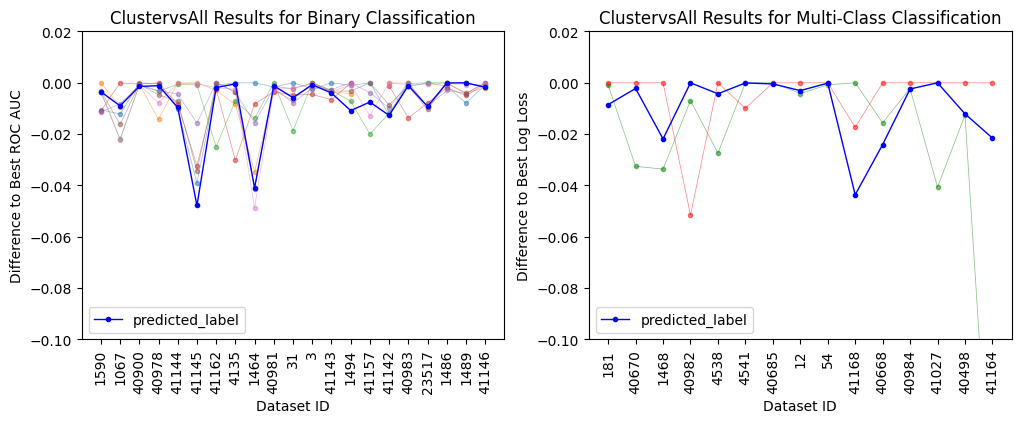

In [29]:
#create a subplot using matploblib
import matplotlib.pyplot as plt


fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
max_per_dataset_bin = df_bin.max(axis = 0)
for i in range(1, df_bin.shape[0]):
    ax1.plot(df_bin.iloc[i, :] - max_per_dataset_bin,  linewidth = 0.5, marker = "o", markersize = 3, alpha = 0.5)
ax1.plot(df_bin.iloc[0, :] - max_per_dataset_bin, color = "blue", linewidth = 1, label = "predicted_label", marker = "o", markersize = 3)
ax1.set_ylim(-0.1, 0.02)
ax1.set_title("ClustervsAll Results for Binary Classification")
ax1.set_xlabel("Dataset ID")
ax1.set_ylabel("Difference to Best ROC AUC")
ax1.set_xticks(ticks = range(0, df_bin.shape[1]), labels = [str(did) for did in binary_test], rotation = 90)
ax1.legend(loc = "lower left")

max_per_dataset_multi = df_multi.max(axis = 0)
ax2.plot(df_multi.iloc[1, :] - max_per_dataset_multi, color = "green", linewidth = 0.5, marker = "o", markersize = 3, alpha = 0.5)
ax2.plot(df_multi.iloc[2, :] - max_per_dataset_multi, color = "red", linewidth = 0.5, marker = "o", markersize = 3, alpha = 0.5)
ax2.plot(df_multi.iloc[0, :] - max_per_dataset_multi, color = "blue", linewidth = 1, label = "predicted_label", marker = "o", markersize = 3)
ax2.set_ylim(-0.1, 0.02)
ax2.set_title("ClustervsAll Results for Multi-Class Classification")
ax2.set_xlabel("Dataset ID")
ax2.set_ylabel("Difference to Best Log Loss")
ax2.set_xticks(ticks = range(0, df_multi.shape[1]), labels = [str(did) for did in multi_test], rotation = 90)
ax2.legend(loc = "lower left")

fig.savefig("clustervsall.png", bbox_inches = "tight")



## Warm start pipeline to gama string


In [1]:
import numpy as np
from SBPort.training.fit_inference_pipeline import PortfolioTransformer
from SBPort.utils import sklearn_to_gama_str
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, log_loss, make_scorer, roc_auc_score
import category_encoders as ce

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    ExtraTreesClassifier,
    RandomForestClassifier,
    GradientBoostingClassifier,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import FeatureAgglomeration
from sklearn.preprocessing import (
    MaxAbsScaler,
    MinMaxScaler,
    Normalizer,
    PolynomialFeatures,
    RobustScaler,
    StandardScaler,
    Binarizer,
)
from sklearn.kernel_approximation import Nystroem, RBFSampler
from sklearn.decomposition import PCA, FastICA
from sklearn.feature_selection import (
    SelectFwe,
    SelectPercentile,
    f_classif,
    VarianceThreshold,
)
from sklearn.impute import SimpleImputer

In [8]:
import skops.io as sio

bin_pipeline = sio.load("SBPort/optimal_configurations/multi/optimal_multi_heuristic_5_psize_16", trusted=True)

In [12]:
portfolios = bin_pipeline.named_steps["cluster"].portfolios

In [4]:
pipeline_strings = []
for key, value in portfolios.items():
    pipelines = [eval(pipeline) for pipeline in value]
    pipeline_strs = [sklearn_to_gama_str(pipeline) for pipeline in pipelines]
    pipeline_strings.append(pipeline_strs)
print(pipeline_strings)